<a href="https://colab.research.google.com/github/Vokturz/Curso-Python-BCCh/blob/main/tarea/Tarea_final_pauta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

Decimos que una palabra es palíndromo si esta se lee igual hacia adelante y hacia atrás. Algunos ejemplos son
- radar
- anilina
- reconocer
- somos
- arenera

Vamos a escribir una función que, dado un string, diga si la palabra es o no es un palíndromo

*Hint 1: ¿sabías que un string tiene propiedades similares a una lista en Python?
por ejemplo el string `un_string = "radar"` tiene como primer elemento `un_string[0] = r`, segundo elemento `un_string[1] = a` y así.*

*Hint 2: ¡En Python existe una forma muy sencilla de dar vuelta una lista!*

In [15]:
def es_palindromo(un_string):
  """Determina si un_string es o no palindromo"""
  # hacer algo con un_string
  un_string = un_string.lower()
  return un_string == un_string[::-1]

############################
## NO MODIFICAR ESTE APARTADO
## Si las definiciones están correctas, entonces esto no debería mostrar error
assert es_palindromo("bala") == False, "No es Palindromo"
assert es_palindromo("palindromo") == False, "No es Palindromo"
assert es_palindromo("alas") == False, "No es Palindromo"
assert es_palindromo("radar") == True, "Si es Palindromo"
assert es_palindromo("somos") == True, "Si es Palindromo"
assert es_palindromo("Reconocer") == True, "Si es Palindromo"
anita = "anita lava la tina"
anita_sin_espacios = anita.replace(" ", "")
assert es_palindromo(anita_sin_espacios) == True, "Si es Palindromo"

# Ejercicio 2

1. Dado un diccionario de indicadores mensuales, defina
 - Una función que calcule la media de un indicador dada una clave
 - Una función que, dado un indicador, retorne el mes más alto. Asuma que la lista de cada indicador está ordenada de Julio a Diciembre
 - Una función que, dado un indicador, calcule la variación porcentual promedio de dicho indicador a lo largo de los meses.

 Le puede ser útil recordar que:

   $\Large\text{Promedio} = \frac{\sum_i \text{elemento}_i}{N}$

   $\Large\Delta \%_\text{actual} = \frac{\text{periodo actual} - \text{periodo anterior}}{\text{periodo anterior}} \times 100 $


Se recomienda responder este ejercicio usando NumPy.


In [40]:
import numpy as np

# Los indicadores están ordenados de Julio a Diciembre
indicadores_mensuales = {
    "Tasa de Interés": [1.5, 1.7, 1.6, 1.4, 1.3, 1.4],
    "Inflación": [2.5, 2.7, 2.4, 2.1, 2.2, 2.3],
    "Crecimiento PIB": [3.1, -1.5, 0.5, 1.0, 0.8, -0.4]
}

indice_meses_semestre = ["Julio", "Agosto", "Septiembre",
                         "Octubre", "Noviembre", "Diciembre"]

def mes_maximo(indicadores, clave, indice_meses):
    """Retorna el mes donde el indicador fue máximo"""
    # determinar el indice máximo
    indice_mes_maximo = np.argmax(indicadores[clave])
    # retornar el mes cuyo indice es máximo
    return indice_meses[indice_mes_maximo] # no modificar

def variacion_porcentual_promedio(indicadores, clave):
    """Calcula la variación porcentual promedio entre meses consecutivos para un indicador"""
    variaciones = np.diff(indicadores[clave]) / indicadores[clave][:-1] * 100
    # calcule todas las variaciones
    variacion_promedio = np.mean(variaciones) # calcule la variacion promedio
    return variacion_promedio.round(2).tolist() # no modificar

############################
## NO MODIFICAR ESTE APARTADO
## Si las definiciones están correctas, entonces esto no debería mostrar error
assert mes_maximo(indicadores_mensuales, "Tasa de Interés", indice_meses_semestre) == "Agosto", "Incorrecto"
assert variacion_porcentual_promedio(indicadores_mensuales, "Inflación") == -1.26, "Variación porcentual incorrecta"


# Ejercicio 3: Merge de DataFrames

Hay dos DataFrames, uno con la información de distintos estudiantes, y otro con la información de su nota en el examen de matemáticas. Ambos DataFrames tienen la columna ID en común

*DataFrame 1*: Información de Estudiantes

ID | Nombre  | Curso
---|--------|------
1  | Juan   | 4° A
2  | Ana    | 4° B
3  | Pedro  | 3° A
4  | Lucia  | 3° B
5  | Carmen | 2° A

*DataFrame 2*: Informacion Notas por ID

ID | Materia | Nota
---|---------|-----
1  | Mat     | 6.5
3  | Mat     | 5.8
2  | Mat     | 6.0
5  | Mat     | 6.7

**Instrucciones**:
1. Cree los dos DataFrames anteriores usando Pandas. Puede partir creando un diccionario para cada uno y luego transformar ello a un DataFrame.
2. Haga un merge de ambos DataFrames usando la columna ID como clave. El resultado debe contener sólo los estudiantes que tengan una nota registrada.
3. Defina `"Nombre"` como el indice del resultado y obtenga cual es la nota de Juan.
4. Calcula la nota promedio de todos los estudiantes
5. Cuenta la cantidad de estudiantes de cada curso y que tienen nota

In [97]:
import pandas as pd

# 1. Crear DataFrames
estudiantes = {
    "ID" : [1,2,3,4,5],
    "Nombre" : ["Juan", "Ana", "Pedro", "Lucia", "Carmen"],
    "Curso" : ["4°A", "4°B", "3°A", "3°B", "2°A"]
}
df_estudiantes = pd.DataFrame(estudiantes, index=[1,2,3,4,5]) # Rellenar con un diccionario

notas = {
    "ID" : [1,3,2,5],
    "Materia" : ["Mat", "Mat", "Mat", "Mat"],
    "Nota" : [6.5, 5.8, 6.0, 6.7]
}
df_notas = pd.DataFrame(notas) # Rellenar con un diccionario

# 2. Merge de DataFrames
df_resultado = pd.merge(df_estudiantes, df_notas, on="ID", how="inner")
dimensiones_resultado = df_resultado.shape

#  3. Setear el indice
df_resultado = df_resultado.set_index("Nombre") # defina Nombre como indice
nota_de_juan = df_resultado.loc["Juan", "Nota"]

# 4. Calcular el promedio en notas
promedio = df_resultado["Nota"].mean()

# 5. Determina la cantidad final de estudiantes por curso
estudiantes_curso_cnt = df_resultado.groupby("Curso")["ID"].count()

############################
## NO MODIFICAR ESTE APARTADO
## Si las definiciones están correctas, entonces esto no debería mostrar error
assert dimensiones_resultado == (4,5), "Merge incorrecto"
assert nota_de_juan == 6.5, "Nota de Juan incorrecta"
assert round(promedio, 2) == 6.25, "Promedio incorrecto"
assert list(estudiantes_curso_cnt) == [1,1,1,1], "Conteo de estudiantes incorrecto"

# Ejercicio 4: Todo en un mismo gráfico

El archivo [`monedas_lat_usd.csv`](https://raw.githubusercontent.com/Vokturz/Curso-Python-BCCh/main/tarea/monedas_lat_usd.csv) contiene la conversión dolar Estadounidense a distintas monedas de Latinoamérica en distintos años.

La idea de este ejercicio es leer el archivo con Pandas y graficar cada una de las monedas con un gráfico de linea, todo sobre la misma figura y usando una escala logarítmica.

**Instrucciones**:
1. Lea el archivo [`monedas_lat_usd.csv`](https://raw.githubusercontent.com/Vokturz/Curso-Python-BCCh/main/tarea/monedas_lat_usd.csv)  con Pandas y guardelo (deberá indicar la url) en la `variable df_monedas`
2. Obtenga los valores que hubieron el 2003
3. Para cada columna (exceptuando el Periodo), grafique la variacion porcentual

En particular, se requiere graficar la diferencia porcentual de cada año con respecto al 2003.


In [103]:
df_monedas = pd.read_csv("https://raw.githubusercontent.com/Vokturz/Curso-Python-BCCh/main/tarea/monedas_lat_usd.csv")
df_monedas

,Periodo,Peso argentino,Boliviano,Peso Chileno,Peso colombiano,Peso mexicano,Nuevo sol peruano
0,2003,2.9179,7.6302,691.5356,2875.0892,10.7906,3.4783
1,2004,2.9386,7.9246,609.5500,2626.0066,11.2830,3.4129
2,2005,2.9208,8.0341,559.8628,2320.5654,10.8945,3.2944
3,2006,3.0729,7.9491,530.2631,2357.9625,10.8976,3.2746
4,2007,3.1141,7.7868,522.6907,2076.6126,10.9266,3.1291
5,2008,3.1584,7.1956,521.7896,1962.7632,11.1260,2.9207
6,2009,3.7267,6.9762,559.6673,2155.3993,13.5094,3.0112
7,2010,3.9093,6.9770,510.3766,1898.0598,12.6307,2.8243
8,2011,4.1255,6.9032,483.3640,1846.9528,12.4241,2.7533
9,2012,4.5410,6.8726,486.7466,1796.9202,13.1658,2.6363


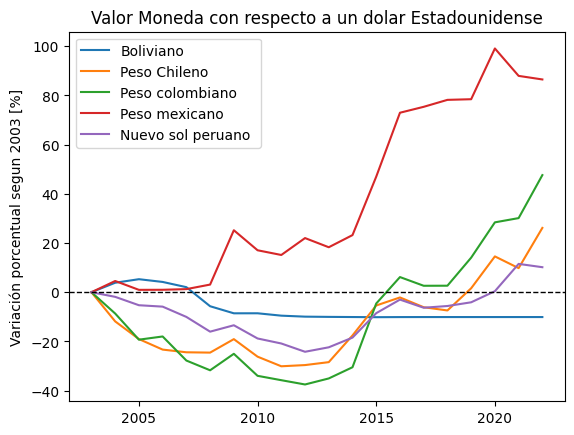

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargue el archivo
df_monedas = pd.read_csv("https://raw.githubusercontent.com/Vokturz/Curso-Python-BCCh/main/tarea/monedas_lat_usd.csv")
# Defina los valores
valores_2003 = df_monedas.loc[0]

# Inicialice la figura
fig, ax = plt.subplots()

# Itere sobre las columnas
for col in df_monedas.columns[1:]:
  variacion = (df_monedas[col]-valores_2003[col])/valores_2003[col]*100
  ax.plot(df_monedas["Periodo"], variacion, label=col)

############################
## NO MODIFICAR ESTE APARTADO
plt.xticks([2005, 2010, 2015, 2020])
plt.legend()
plt.ylabel("Variación porcentual segun 2003 [%]")
plt.title("Valor Moneda con respecto a un dolar Estadounidense")
plt.axhline(0, ls='--', lw=1, color='k')
plt.show()

Si hubiesemos querido graficar a todos menos Argentina, ¿Qué debíamos hacer?

# Ejercicio 5

El archivo [confirmados](https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv) contiene información de los casos confirmados acumulados de contagios Covid-19 desde Marzo 2020 a Agosto 2023.

A Continuación se lee dicho archivo y se le da cierto formato de tal forma que sea más facil trabajar con el:

In [144]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv")
df.head()

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,80368,80368,80372,80374,80374,80378,80378,80379,80381,80384
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,114986,114995,114999,115001,115009,115013,115016,115016,115021,115024
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,186531,186535,186536,186545,186549,186557,186559,186563,186575,186582
3,Atacama,0,0,0,0,0,0,0,0,0,...,120899,120902,120907,120908,120910,120911,120911,120912,120916,120916
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,214487,214489,214493,214499,214502,214507,214512,214515,214530,214547


In [145]:
# pasamos todas las columnas a una sola, excluyendo "region"
df = df.melt(["Region"])

# cambiamos los nombres
df.columns = ["region", "fecha", "confirmados"]

 # le decimos que fecha es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

df.head()


,region,fecha,confirmados
0,Arica y Parinacota,2020-03-03,0
1,Tarapacá,2020-03-03,0
2,Antofagasta,2020-03-03,0
3,Atacama,2020-03-03,0
4,Coquimbo,2020-03-03,0


In [147]:
df = df[df["region"]!="Total"]

Dado el DataFrame anterior, se pide que grafique en un misma figura dos gráficos uno al lado del otro, donde:

1. El primero es de Fecha v/s **total** confirmados, no muestre barras de error
2. El segundo es de Fecha v/s confirmados según región

Ambos gráficos se pueden realizar directamente con Pandas, o bien utilizar Seaborn. En específico, recomendamos utilizar [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

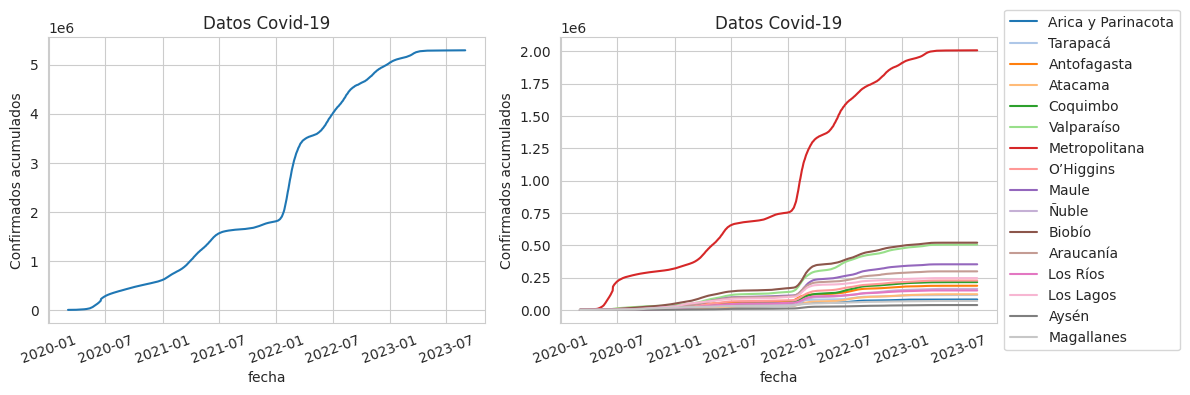

In [160]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = axes[0]
sns.lineplot(data=df, x="fecha", y="confirmados", ax=ax1, estimator="sum", errorbar=None)

ax2 = axes[1]
sns.lineplot(data=df, x="fecha", y="confirmados", ax=ax2, hue="region", palette="tab20")

# dejamos la leyenda del segundo grafico al lado derecho
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# embellecemos un poco el gráfico
for ax in axes:
  ax.tick_params(axis='x', rotation=20) # rotamos las etiquetas del eje x
  ax.set_title("Datos Covid-19")
  ax.set_ylabel("Confirmados acumulados")
fig.tight_layout()
fig.savefig("figura.png")